# Data Normalization

When the scales scales of the two variables are not similar normalization can speed up convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Define the quadratic function with two input features
def quadratic_function(X1, X2):
    return 4 + 3 * X1**2 + X2 + np.random.randn(X1.shape[0], 1)

# Generate synthetic data
np.random.seed(42)
m = 10000
X1 = 2 * np.random.rand(m, 1)
X2 = 0.1 * np.random.randn(m, 1)
y = quadratic_function(X1, X2)

# Normalize the features
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

# Plot the data after normalization
X_normalized = normalize_features(np.c_[X1, X2])

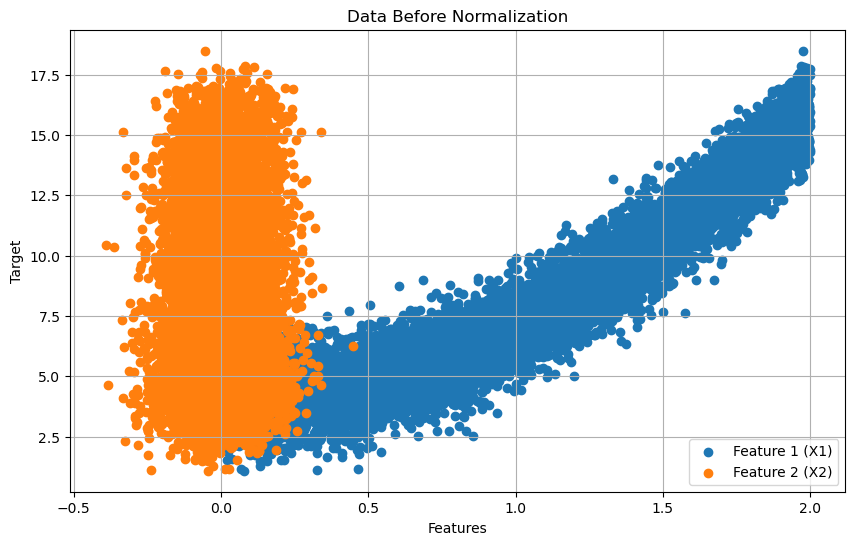

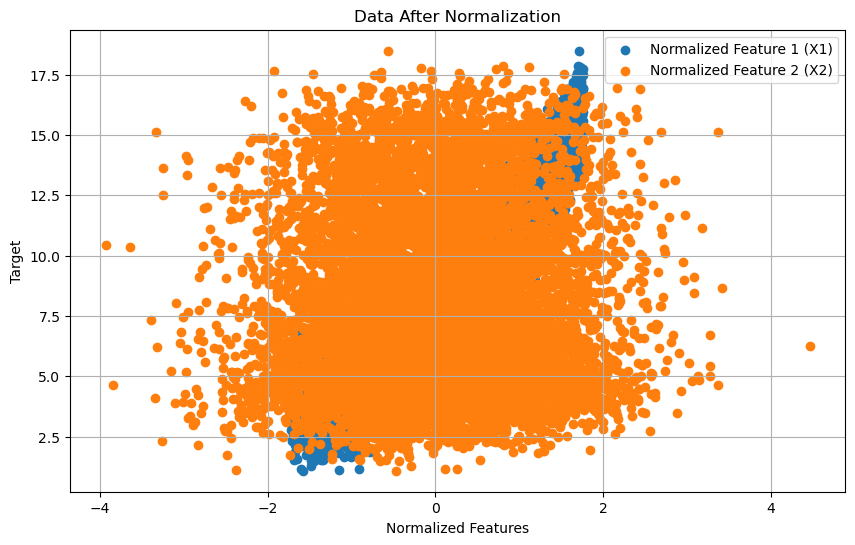

In [3]:
# Plot the data before normalization
plt.figure(figsize=(10, 6))
plt.scatter(X1, y, label='Feature 1 (X1)')
plt.scatter(X2, y, label='Feature 2 (X2)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Data Before Normalization')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[:, 0], y, label='Normalized Feature 1 (X1)')
plt.scatter(X_normalized[:, 1], y, label='Normalized Feature 2 (X2)')
plt.xlabel('Normalized Features')
plt.ylabel('Target')
plt.title('Data After Normalization')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Implement gradient descent
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize theta with zeros
    losses = []
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Compute gradients
        theta = theta - learning_rate * gradients  # Update theta
        loss = np.mean((X.dot(theta) - y)**2)  # Compute loss
        losses.append(loss)
    return theta, losses

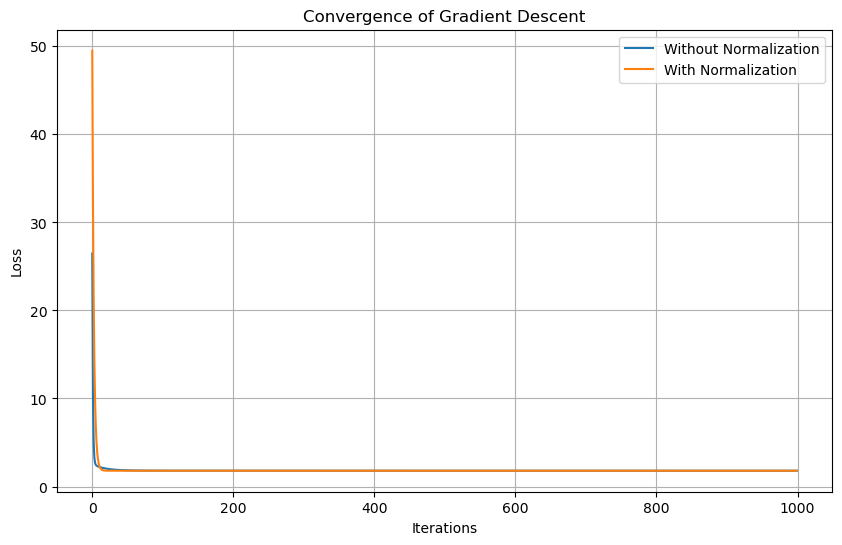

Time taken without normalization: 0.27017903327941895 seconds
Time taken with normalization: 0.22695279121398926 seconds


In [5]:
# Run gradient descent with and without normalization and measure time
learning_rate = 0.1
iterations = 1000

# Without normalization
start_time = time.time()
X_unnormalized = np.c_[np.ones((m, 1)), X1, X2]
theta_unnormalized, losses_unnormalized = gradient_descent(X_unnormalized, y, learning_rate, iterations)
end_time = time.time()
time_unnormalized = end_time - start_time

# With normalization
start_time = time.time()
X_normalized = normalize_features(np.c_[X1, X2])
X_normalized_b = np.c_[np.ones((m, 1)), X_normalized]
theta_normalized, losses_normalized = gradient_descent(X_normalized_b, y, learning_rate, iterations)
end_time = time.time()
time_normalized = end_time - start_time

# Plot the convergence behavior
plt.figure(figsize=(10, 6))
plt.plot(losses_unnormalized, label='Without Normalization')
plt.plot(losses_normalized, label='With Normalization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

print("Time taken without normalization:", time_unnormalized, "seconds")
print("Time taken with normalization:", time_normalized, "seconds")
